# Class: STATS 507
Professor: Keith, Levin 

Student: Martin, Zanaj, mzanaj@umich.edu

Homework 5

I have not disclosed my code with no additional individual. 

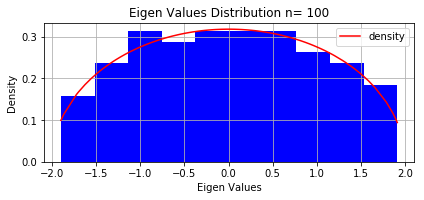

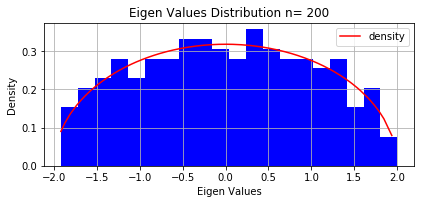

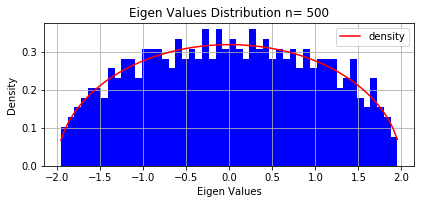

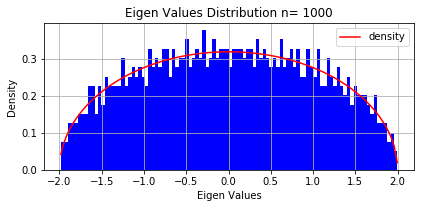

In [659]:
#QUESTION 1 , ~ 2 hours
import numpy as np
import math
#Warm up:  Around the Semicircular Law
#Random Matrix Theory
#Matrix with independent entries
    #Eigenvalues of a random symmetric matrix with normal entries
    #Joint distribution follows a Wigner semicircular distribution
#Define 
    #Matrix-valued random variable Z (R^2), by generating Zi,j iid (0, 1/n) 1<=i <=j<=n
    #set Zi,j = Zj,i  (Wigner Matrix )
    
def wigner_density(x):
    #Ensure proper boundaries 
    if(x>=-2 and x<=2 ):
        #pi number 
        pie= math.pi
        #f(x)
        f_x = np.sqrt(4-x**2)/(2*pie)
        return f_x

#Test
#x= np.int_(1) or  x = 1.2
#print(type(x))
#print(wigner_density(x))
def generate_wigner(x):
    #Check if is integer
    if(type(x) is not int):
        raise TypeError("Please, ensure an integer value")
    if(x<=0):
        raise ValueError("Please, ensure a positive value")
        
    #Define Z, mean 0, variance = 1/x, x*x
    mean = 0
    sd = np.sqrt(1/x)
    
    #Now this is the matrix with iid
    my_matrix= np.reshape(np.random.normal(mean,sd, (x,x)),(x,x))
    
    #Get the top and bottom half
    top = np.triu(my_matrix)
    
    #Get transpose of the bottom, 
    bottom = np.tril(my_matrix.transpose(),-1 )
    
    #Combine to form wigner
    wigner = top+bottom
    
    #Transform into matrix
    mat = np.matrix(wigner)
    
    return(mat)
#TEST
#generate_wigner(3)

#Eigen Value
#Reference: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigh.html#numpy.linalg.eigh
from numpy import linalg as LA
def get_spectrum(my_matrix):
    values, vector = LA.eigh(my_matrix)
    return(values)
#TEST
#my_matrix= ([-0.12017518, -0.3109795, -0.44079235, 0.22647091, 0.16791682, -0.37598875 ,0.71018827, -0.05480588, 0.02041059])
#data= np.array(my_matrix)
#data.shape = (3,3)

import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline
#Data set
my_list = [100,200, 500, 1000]
for i in range(len(my_list)):
    #100
    #Set Picture in decent size 
    plt.figure(figsize=(6,10))
    plt.subplot(4,1,i+1)
    #Info + legend
    plt.title("Eigen Values Distribution n= %d" %my_list[i])
    plt.xlabel("Eigen Values")
    plt.ylabel("Density")
    plt.grid()
    #Bins size
    num=my_list[i]
    num_bins = int(num/10)
    #Get Values
    x= get_spectrum(generate_wigner(num))
    #Get density 
    vectorizedDensity = np.vectorize(wigner_density)
    wig_density = vectorizedDensity(x)
    #Plot (normalized) values
    plt.hist(x,density= 1,bins = num_bins, color = 'blue')
    #Pot density in red 
    plt.plot(x,wig_density,'red',label='density')
    plt.legend(loc=1)
    #No overlapping
    _=plt.tight_layout()
#N=500 and = 1000, seem to have a better fit of the the half circle. Which does indeed prove the orignal claim of Wigner:
#as n goes to infinity its approximatin can be given by the circle.




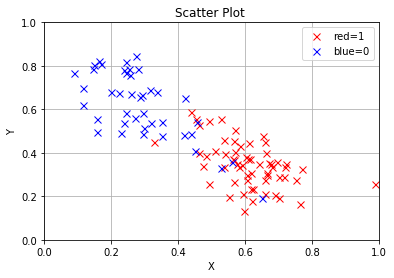

In [665]:
#QUESTION 2, ~2 hours
#PART 1 
#Read files 
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


#Ensure that the proper path is put (I do not know your path in your machine)
#points = np.loadtxt('C:/Users/user/Downloads/hw5_files/hw5_files/points.dlm')
points = np.loadtxt('./hw5_files/hw5_files/points.dlm')
labels = np.load('labels.npy')

#2 Scatter blue and red
red = []
blue = []
#Divide zeros and ones into blue and reds
for x in range(len(labels)):
    if(labels[x]==0):
        blue.append(x)
    else:
        red.append(x)
#Get x,y coordinates
red_x = []
red_y = []
for y in red:
    red_x.append(points[y][0])
    red_y.append(points[y][1])
blue_x = []
blue_y = []
for y in blue:
    blue_x.append(points[y][0])
    blue_y.append(points[y][1])
#Graph info
plt.title("Scatter Plot ")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
#Plot
plt.plot(red_x,red_y, 'xr', markersize = 7, label = 'red=1')
plt.plot(blue_x,blue_y,'xb', markersize = 7, label = 'blue=0')
#Limits
plt.xlim(0,1)
plt.ylim(0,1)
#Legend
plt.legend(loc=1)

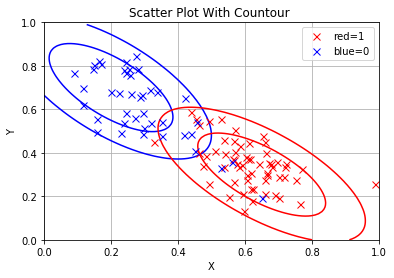

In [666]:
#PART 2 
#Imports
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats


#Ensure that the proper path is put (I do not know your path in your machine)
#points = np.loadtxt('./hw5_files/hw5_files/points.dlm')
#points = np.loadtxt('C:/Users/user/Downloads/hw5_files/hw5_files/points.dlm')
points = np.loadtxt('./hw5_files/hw5_files/points.dlm')
labels = np.load('labels.npy')

#2 Scatter blue and red
red = []
blue = []

#Divide zeros and ones into blue and reds
for x in range(len(labels)):
    if(labels[x]==0):
        blue.append(x)
    else:
        red.append(x)
        
#Get x,y coordinates
red_x = []
red_y = []
for y in red:
    red_x.append(points[y][0])
    red_y.append(points[y][1])
blue_x = []
blue_y = []
for y in blue:
    blue_x.append(points[y][0])
    blue_y.append(points[y][1])

#Means(2x1 vectors)
mean_1= [0.2, 0.7]
mean_2 = [0.65, 0.3]

#Standard Deviations (2 x 2 matrix)
sd_1= [[0.015,-0.011],[-0.011,0.018]]
sd_2 = [[0.016,-0.011],[-0.011,0.016]]

#Multivariate Normal Distribution
mvn_1= scipy.stats.multivariate_normal(mean_1,sd_1)
mvn_2= scipy.stats.multivariate_normal(mean_2,sd_2)

#Mgrid and Pos 
x,y = np.mgrid[0:1:.01,0:1:.01]
pos= np.empty(x.shape+ (2,))
pos[:,:,0]= x; pos[:,:,1]=y

#Intervals 68 & 95
interval_68_0= np.exp((-1/2) * scipy.stats.chi2.ppf(0.68, 2))/(2*np.pi*np.sqrt(np.linalg.det(sd_1)))                                                               
interval_68_1= np.exp((-1/2) * scipy.stats.chi2.ppf(0.68, 2))/(2*np.pi*np.sqrt(np.linalg.det(sd_2))) 

interval_95_0= np.exp((-1/2) * scipy.stats.chi2.ppf(0.95, 2))/(2*np.pi*np.sqrt(np.linalg.det(sd_1))) 
interval_95_1= np.exp((-1/2) * scipy.stats.chi2.ppf(0.95, 2))/(2*np.pi*np.sqrt(np.linalg.det(sd_2))) 

#Plot Contour
_=plt.contour(x,y,mvn_1.pdf(pos), levels= [interval_95_0, interval_68_0], colors = "blue")
_=plt.contour(x,y,mvn_2.pdf(pos), levels= [interval_95_1, interval_68_1], colors= "red")


#Graph info
plt.title("Scatter Plot With Countour ")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()

#Plot
plt.plot(red_x,red_y, 'xr', markersize = 7, label = 'red=1')
plt.plot(blue_x,blue_y,'xb', markersize = 7, label = 'blue=0')
#Limits
plt.xlim(0,1)
plt.ylim(0,1)
#Legend
plt.legend(loc=1)





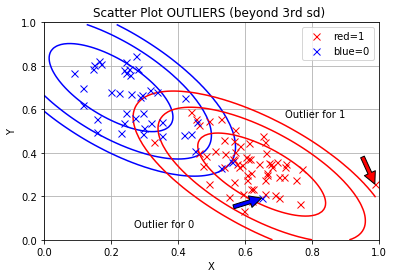

In [667]:
#PART 3, ~ 3 hours
#Imports
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats
from matplotlib.text import OffsetFrom

#Read files 
#Ensure that the proper path is put (I do not know your path in your machine)
#points = np.loadtxt('C:/Users/user/Downloads/hw5_files/hw5_files/points.dlm')
points = np.loadtxt('./hw5_files/hw5_files/points.dlm')
labels = np.load('labels.npy')

#2 Scatter blue and red
red = []
blue = []

#Divide zeros and ones into blue and reds
for x in range(len(labels)):
    if(labels[x]==0):
        blue.append(x)
    else:
        red.append(x)
        
#Get x,y coordinates
red_x = []
red_y = []
for y in red:
    red_x.append(points[y][0])
    red_y.append(points[y][1])
blue_x = []
blue_y = []
for y in blue:
    blue_x.append(points[y][0])
    blue_y.append(points[y][1])

#Means(2x1 vectors)
mean_1= [0.2, 0.7]
mean_2 = [0.65, 0.3]

#Standard Deviations (2 x 2 matrix)
sd_1= [[0.015,-0.011],[-0.011,0.018]]
sd_2 = [[0.016,-0.011],[-0.011,0.016]]

#Multivariate Normal Distribution
mvn_1= scipy.stats.multivariate_normal(mean_1,sd_1)
mvn_2= scipy.stats.multivariate_normal(mean_2,sd_2)

#Mgrid and Pos 
x,y = np.mgrid[0:1:.01,0:1:.01]
pos= np.empty(x.shape+ (2,))
pos[:,:,0]= x; pos[:,:,1]=y

#Intervals 68 ,95, & 99  (3rd sd, anything beyond that is an outlier)
interval_68_0= np.exp((-1/2) * scipy.stats.chi2.ppf(0.68, 2))/(2*np.pi*np.sqrt(np.linalg.det(sd_1)))                                                               
interval_68_1= np.exp((-1/2) * scipy.stats.chi2.ppf(0.68, 2))/(2*np.pi*np.sqrt(np.linalg.det(sd_2))) 

interval_95_0= np.exp((-1/2) * scipy.stats.chi2.ppf(0.95, 2))/(2*np.pi*np.sqrt(np.linalg.det(sd_1))) 
interval_95_1= np.exp((-1/2) * scipy.stats.chi2.ppf(0.95, 2))/(2*np.pi*np.sqrt(np.linalg.det(sd_2))) 

interval_99_0=np.exp((-1/2) * scipy.stats.chi2.ppf(0.99, 2))/(2*np.pi*np.sqrt(np.linalg.det(sd_1))) 
interval_99_1=np.exp((-1/2) * scipy.stats.chi2.ppf(0.99, 2))/(2*np.pi*np.sqrt(np.linalg.det(sd_2))) 


#Plot Contour
_=plt.contour(x,y,mvn_1.pdf(pos), levels= [interval_99_0,interval_95_0, interval_68_0], colors = "blue")
_=plt.contour(x,y,mvn_2.pdf(pos), levels= [interval_99_1,interval_95_1, interval_68_1], colors= "red")


#Graph info
plt.title("Scatter Plot OUTLIERS (beyond 3rd sd) ")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()

#Plot
plt.plot(red_x,red_y, 'xr', markersize = 7, label = 'red=1')
plt.plot(blue_x,blue_y,'xb', markersize = 7, label = 'blue=0')
#Limits
plt.xlim(0,1)
plt.ylim(0,1)
#Legend
plt.legend(loc=1)

#Outliers for Blue (from the graph we can deduct)
outliers_blu = []
for x in range(len(blue_x)):
    if(blue_x[x]>0.6):
        point= (blue_x[x],blue_y[x])
        outliers_blu.append(point)

#Outliers for Red (from the graph we can deduct)
outliers_red = []
for x in range(len(red_x)):
    if(red_x[x]>0.9):
        point= (red_x[x],red_y[x])
        outliers_red.append(point)
        
#Plot Outliers blu
for x in outliers_blu:
    plt.annotate("Outlier for 0", xy=(x), 
            xytext= (0.45,0.05),arrowprops =dict(facecolor='blue',
            shrink = 0.55),horizontalalignment='right',
            verticalalignment='bottom')
    
#Plot Outliers red
for x in outliers_red:
    plt.annotate("Outlier for 1", xy=(x), 
            xytext= (0.90,0.60),arrowprops =dict(facecolor='red',
            shrink = 0.55),horizontalalignment='right',
            verticalalignment='top')

#Thoughts on normality: 
#Most of the data seems to be normal, besides a couple outliers. 


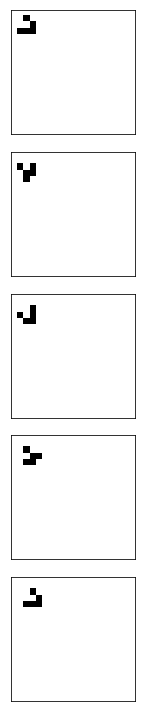

In [664]:
#QUESTION 3
#THE GAME OF LIFE
import numpy as np

#Check for valid board
def is_valid_board(board):
    #Check type
    if(type(board) is not np.ndarray):
        raise TypeError("Please ensure that board is of type numpy.ndarray")
        
    #Check 2 dimensional 
    elif(board.ndim != 2):
        raise ValueError("Please ensure that board is a 2 dimensional one")
    
    #Check all elements
    for x in board:
        for y in x :
            if(y== 1.0 or y== 0.0):
                continue
            else:
                return False
    return True
#Test
#s = np.array([[1.0,0.0,1.0],[1.0,1.0,1.0],[0.0,1.0,1.0], [1.0,1.0,1.0]])
#is_valid_board(s)

#Next Step 
def gol_step(board):
    
    #Check that board is valid
    if(is_valid_board(board)== False):
        return
    
    #Get board dimensions
    dimensions= board.shape
    m = dimensions[0]
    n = dimensions[1]
    
    #Create  a new board
    next_board = np.copy(board)
    
    #Possible scenarios in terms of neighbours
    neighbors = [(1,0), (1,-1), (0,-1), (-1,-1), (-1,0), (-1,1), (0,1), (1,1)]

    #Each element in the Board 
    for x in range(m):
        for y in range(n):
            #Check count of live neighbours
            live_neighbors = 0
            for neighbor in neighbors:
                row = (x + neighbor[0])
                col =(y  + neighbor[1])
                
                if (row < m and row >= 0):
                    
                    if(col < n and col >= 0):
                        
                        if(board[row][col] == 1):
                            live_neighbors += 1
                            
            #Determine if lives or dies
            if board[x,y] == 1:
                if(live_neighbors < 2 or live_neighbors > 3):
                    next_board[x,y] = 0
        
            if board[x,y] == 0 and live_neighbors == 3:
                next_board[x,y] = 1
            
    return(next_board)
#Test    
#s= np.array([[0.0,1.0,0.0],[0.0,0.0,1.0],[1.0,1.0,1.0],[0.0,0.0,0.0]])
#print(s)
#p=gol_step(s)


def draw_gol_board(board):
    #Check that board is valid
    if(is_valid_board(board)== False):
        return
    
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.imshow(board, cmap = plt.get_cmap('binary'))
    plt.xticks([])
    plt.yticks([])

#Test
#draw_gol_board(gol_step(s))    

#Draw 20 by 20 board
board_20 = np.zeros((20,20))
board_20[1][2] = 1
board_20[2][3] = 1
board_20[3][1] = 1
board_20[3][2] = 1
board_20[3][3] = 1

#Test 
#print(board_20)
draw_gol_board(board_20)


#The 5 Subplots of 20 x 20 board 
for i in range(5):
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.subplot(5,1,i+1)
    draw_gol_board(board_20)
    board_20= gol_step(board_20)
    _ = plt.tight_layout()

